In [3]:
import os
import pandas as pd
from google.cloud import bigquery

In [ ]:


def biqquery_to_csv(query_for_data, path = ''):

    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'bigq_cred.json'


    client = bigquery.Client()

    query_job = client.query(query_for_data)
    query_result = query_job.result()

    df = query_result.to_dataframe()
    print(f" first 5 rows: {df.head()}")

    df.to_csv(f"{path}city_congestion.csv")



In [ ]:
biqquery_to_csv("select * from `bigquery-public-data.covid19_geotab_mobility_impact_eu.city_congestion`")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta



In [8]:
data = pd.read_csv('/Users/simransodhi/projects/bigquery_project/city_congestion.csv')

In [9]:
class CityData:

    def __init__(self, name):

        if name not in set(data ["city_name"].to_list()):
            raise AttributeError(f"city not in dataset! please pick one of {set(data ['city_name'].to_list())}")

        self.name = name
        self.city_data = data[data['city_name'] == name]


    def get_data_date_range(self):
        self.city_data["date_time"] = pd.to_datetime(self.city_data["date_time"])
        return min(self.city_data["date_time"]), max(self.city_data["date_time"])

    def __repr__(self):
        return (f"number of data points for {self.name}: {len(self.city_data)}, "
                f"date range: from {self.get_data_date_range()[0]} till {self.get_data_date_range()[1]}")

    def save_city_separately(self):
        self.city_data.to_csv(f"{self.name}_data.csv")



class CityReport:

    def __init__(self, df):
        self.df = df.city_data.sort_values("date_time")

    def visualize_data(self):
        f, ax = plt.subplots(figsize=(21,10))
        ax.set_title('congestion over time')

        i = self.df.set_index(pd.DatetimeIndex(self.df['date_time']))
        i[ 'percent_congestion'].plot(ax=ax, color='blue', label = 'congestion')
        plt.show()


In [10]:
a = CityData("Berlin")

AttributeError: city not in dataset! please pick one of {'Washington', 'Los Angeles', 'Seattle', 'New York', 'Atlanta', 'Chicago', 'San Francisco', 'Ciudad de México'}

In [11]:
a = CityData("Atlanta")

In [12]:
print(a)

number of data points for Atlanta: 6248, date range: from 2020-01-31 19:00:00 till 2020-10-02 19:00:00


<ipython-input-9-a76e694f4313>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.city_data["date_time"] = pd.to_datetime(self.city_data["date_time"])


In [13]:
atlanta_report = CityReport(a)

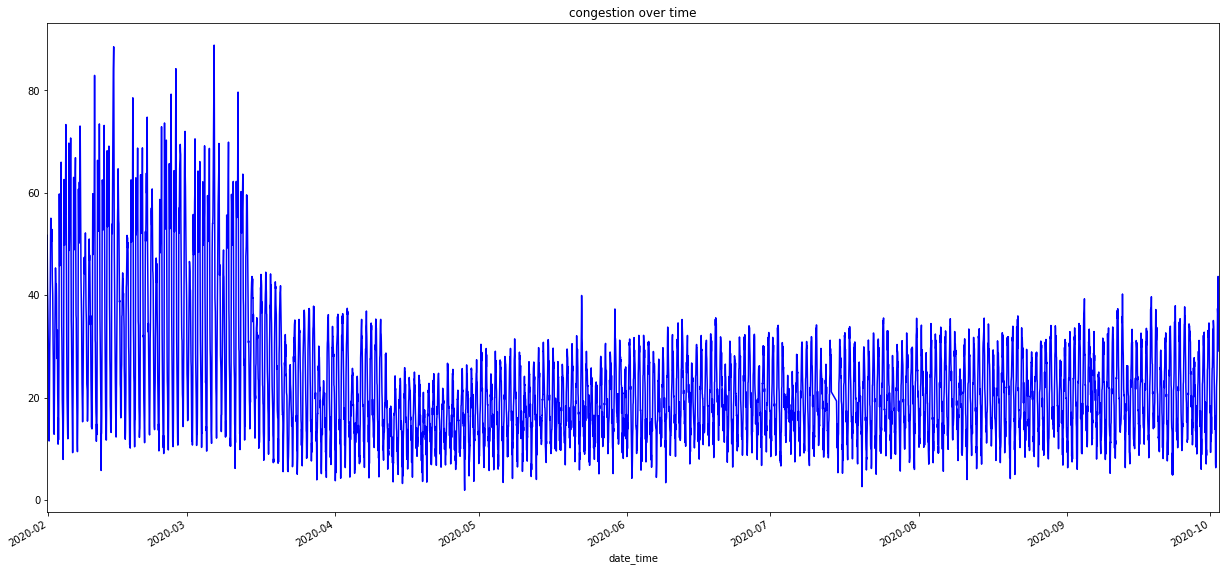

In [14]:
atlanta_report.visualize_data()